# Proyecto módulo 1:  <font color=blue> Suspensión de un vehículo

#### Integrantes: 
>- Ian Mauricio González Borgo
>- Ernesto Martínez Salas
>- Diego Quintero Robles

## Objetivos:

Obtener las ecacuiónes que describen un modelo físico y con lo aprendido en clase, representar dicha simulación mediante gráficas. Encontrar las condiciones iniciales para dar inicio a la simulación y optimicen los resultados. 

### Objetivo específico:

Simular el modelo de una suspensión de un automóvil, representada en una cuarta parte de la misma.

Las ecuaciones que modelan el problema son: 

>- \begin{equation}
    \frac{d^2 Zc}{dt^2}=-\frac{Kcw}{mc} (Zc-Zw) - \frac{Ccw}{mc} (\frac{dZc}{dt}-\frac{dZw}{dt})
    \end{equation}
    
    
>- \begin{equation}
    \frac{d^2 Zw}{dt^2}=\frac{Kcw}{mw} (Zc-Zw) + \frac{Ccw}{mw} (\frac{dZc}{dt}-\frac{dZw}{dt}) - \frac{Kwr}{mw} (Zw-Zr) - \frac{Cwr}{mw} (\frac{dZw}{dt}-\frac{dZr}{dt})
    \end{equation}

Donde: 
>- $x_1 = Zc$ -> la posición del vehículo
>- $x_2 = \begin{equation}\frac{dZc}{dt}\end{equation} $ -> la velocidad del vehículo
>- $x_3 = Zw$ -> la posición de la rueda
>- $x_4 = \begin{equation}\frac{dZw}{dt}\end{equation} $ -> la velocidad de la rueda


>- $Zr = A*np.sin(w*t)$ -> describe la rugosidad del suelo
>- $\begin{equation} \frac{dZr}{dt} = w*A*np.cos(w*t) \end{equation} $

suponiendo que $A=0.05$ y $w=50$

Y así encontramos las siguientes derivadas:
>- \begin{equation} \frac{dx_1}{dt} = \frac{dZc}{dt} = x_2 \end{equation}
>- \begin{equation} \frac{dx_2}{dt} = \frac{d^2 Zc}{dt^2} = -\frac{Kcw}{mc} (x_1-x_3)- \frac{Ccw}{mc} (x_2-x_4)\end{equation}
>- \begin{equation} \frac{dx_3}{dt} = \frac{dZw}{dt} = x_4 \end{equation}
>- \begin{equation} \frac{dx_1}{dt} = \frac{d^2 Zw}{dt^2}=\frac{Kcw}{mw} (x_1-x_3) + \frac{Ccw}{mw} (x_2-x_4) - \frac{Kwr}{mw} (x_3-Zr) - \frac{Cwr}{mw} (x_4-\frac{dZr}{dt}) \end{equation}



Nuestras variables son:
>- $Kcw =$ Constante del resorte del sistema
>- $Kwr =$ Constante de amortiguación de la rueda
>- $Ccw =$ Constante de amortiguación del sistema
>- $Cwr =$ Constante del amoritiguación de la rueda
>- $mc =$ masa del vehículo
>- $mw =$ masa de la rueda

## <font color=blue> Simulaciones

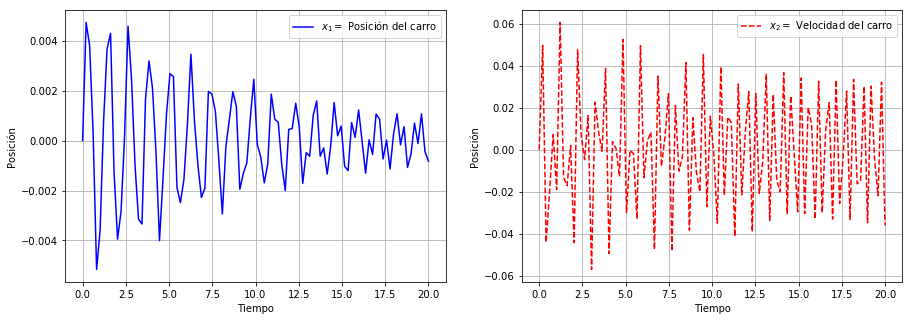

In [99]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

Kwr = 500000
Kcw = 80000
Ccw = 350
Cwr = 15020
mc = 2500
mw = 320
def suspen(x, t):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    #zr, dzr = 0, 0
    A, w = 0.05, 50
    zr = A*np.sin(w*t)
    dzr = w*A*np.cos(w*t)
    return [x2, -Kcw/mc * (x1-x3) - Ccw/mc * (x2-x4), x4, Kcw/mw * (x1-x3) + Ccw/mw * (x2-x4) - Kwr/mw * (x3-zr) - Cwr/mw * (x4-dzr)]

#Condición Inicial
x0 = [0, 0, 0, 0]
tt = np.linspace(0, 20, 100)

xx = odeint(suspen, x0, tt)

x1 = xx[:, 0]
x2 = xx[:, 1]
x3 = xx[:, 2]
x4 = xx[:, 3]

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(tt, x1, '-b', label= '$x_1=$ Posición del carro')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Tiempo')
plt.ylabel('Posición')

plt.subplot(1, 2, 2)
plt.plot (tt, x2, '--r', label = '$x_2=$ Velocidad del carro')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Tiempo')
plt.ylabel('Posición')



plt.show()

Ya que el suelo no es completamente liso, la posición del vehículo empieza con una variación de 4 mm, que es mínima y no se siente al estar dentro del mismo. Con el tiempo va a estabilizarse en 1 mm aproximadamente.

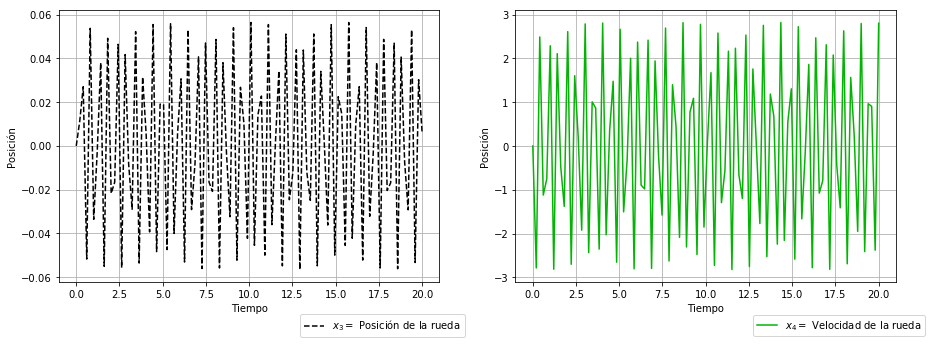

In [101]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(tt, x3, '--k', label= '$x_3=$ Posición de la rueda')
plt.grid()
plt.legend(loc='center',  bbox_to_anchor=(0.85,-.16))
plt.xlabel('Tiempo')
plt.ylabel('Posición')

plt.subplot(1, 2, 2)
plt.plot (tt, x4, '#04B404', label = '$x_4=$ Velocidad de la rueda')
plt.grid()
plt.legend(loc='center',  bbox_to_anchor=(0.85,-.16))
plt.xlabel('Tiempo')
plt.ylabel('Posición')



plt.show()

## Variando un -5%

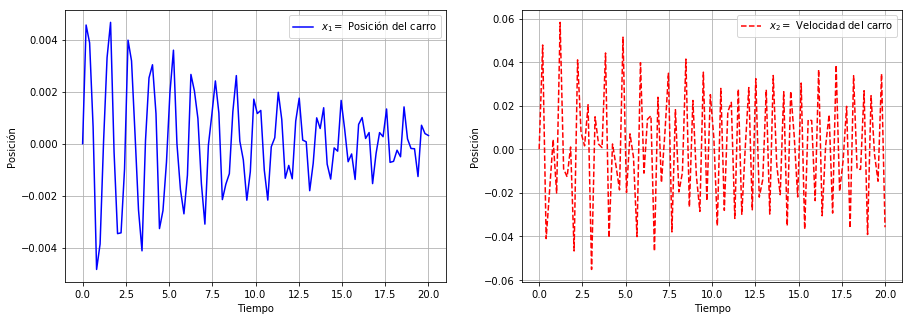

In [102]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

Kwr = 500000
Kcw = 76000
Ccw = 332.5
Cwr = 15020
mc = 2500
mw = 320
def suspen(x, t):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    #zr, dzr = 0, 0
    A, w = 0.05, 50
    zr = A*np.sin(w*t)
    dzr = w*A*np.cos(w*t)
    return [x2, -Kcw/mc * (x1-x3) - Ccw/mc * (x2-x4), x4, Kcw/mw * (x1-x3) + Ccw/mw * (x2-x4) - Kwr/mw * (x3-zr) - Cwr/mw * (x4-dzr)]

#Condición Inicial
x0 = [0, 0, 0, 0]
tt = np.linspace(0, 20, 100)

xx = odeint(suspen, x0, tt)

x1 = xx[:, 0]
x2 = xx[:, 1]
x3 = xx[:, 2]
x4 = xx[:, 3]

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(tt, x1, '-b', label= '$x_1=$ Posición del carro')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Tiempo')
plt.ylabel('Posición')

plt.subplot(1, 2, 2)
plt.plot (tt, x2, '--r', label = '$x_2=$ Velocidad del carro')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Tiempo')
plt.ylabel('Posición')



plt.show()

Entre menor sea la constante de amortiguación del sistema, en mayor tiempo el vehículo llegará a su posición de equilibrio.

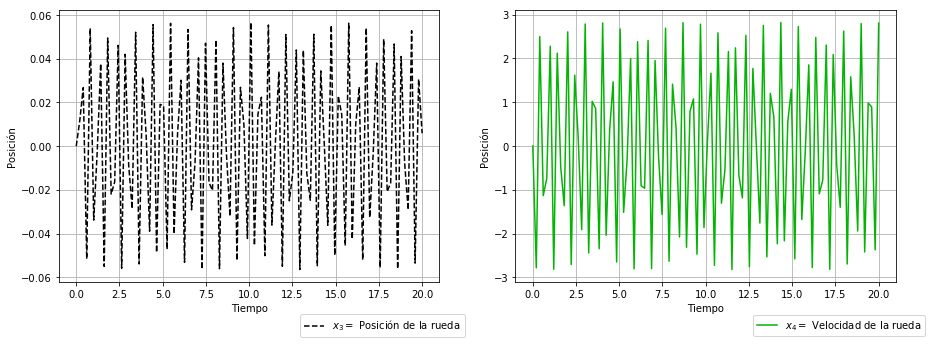

In [103]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(tt, x3, '--k', label= '$x_3=$ Posición de la rueda')
plt.grid()
plt.legend(loc='center',  bbox_to_anchor=(0.85,-.16))
plt.xlabel('Tiempo')
plt.ylabel('Posición')

plt.subplot(1, 2, 2)
plt.plot (tt, x4, '#04B404', label = '$x_4=$ Velocidad de la rueda')
plt.grid()
plt.legend(loc='center',  bbox_to_anchor=(0.85,-.16))
plt.xlabel('Tiempo')
plt.ylabel('Posición')



plt.show()

## Variando un +5%

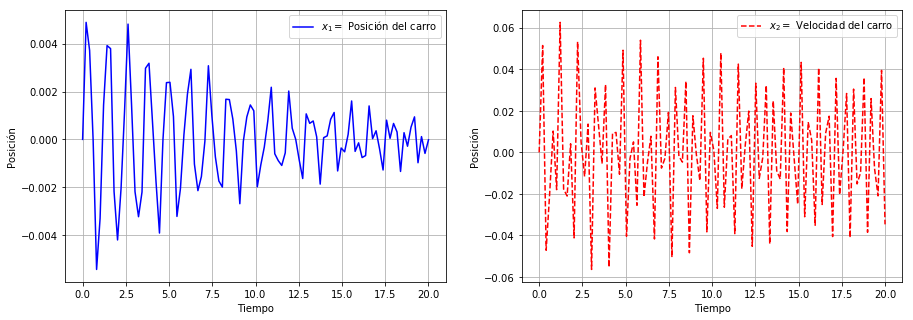

In [104]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

Kwr = 500000
Kcw = 84000
Ccw = 367.5
Cwr = 15020
mc = 2500
mw = 320
def suspen(x, t):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    #zr, dzr = 0, 0
    A, w = 0.05, 50
    zr = A*np.sin(w*t)
    dzr = w*A*np.cos(w*t)
    return [x2, -Kcw/mc * (x1-x3) - Ccw/mc * (x2-x4), x4, Kcw/mw * (x1-x3) + Ccw/mw * (x2-x4) - Kwr/mw * (x3-zr) - Cwr/mw * (x4-dzr)]

#Condición Inicial
x0 = [0, 0, 0, 0]
tt = np.linspace(0, 20, 100)

xx = odeint(suspen, x0, tt)

x1 = xx[:, 0]
x2 = xx[:, 1]
x3 = xx[:, 2]
x4 = xx[:, 3]

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(tt, x1, '-b', label= '$x_1=$ Posición del carro')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Tiempo')
plt.ylabel('Posición')

plt.subplot(1, 2, 2)
plt.plot (tt, x2, '--r', label = '$x_2=$ Velocidad del carro')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Tiempo')
plt.ylabel('Posición')



plt.show()

Entre más grande sea la constante de amortiguación del sistema, en menor tiempo el vehículo llegará a su posición de equilibrio.

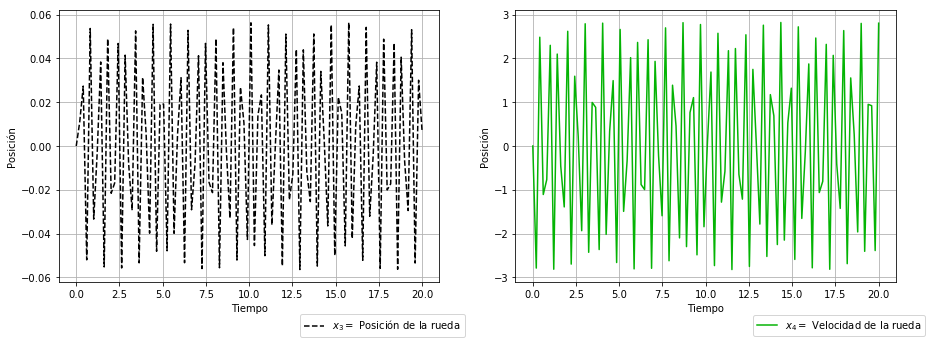

In [105]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(tt, x3, '--k', label= '$x_3=$ Posición de la rueda')
plt.grid()
plt.legend(loc='center',  bbox_to_anchor=(0.85,-.16))
plt.xlabel('Tiempo')
plt.ylabel('Posición')

plt.subplot(1, 2, 2)
plt.plot (tt, x4, '#04B404', label = '$x_4=$ Velocidad de la rueda')
plt.grid()
plt.legend(loc='center',  bbox_to_anchor=(0.85,-.16))
plt.xlabel('Tiempo')
plt.ylabel('Posición')



plt.show()

La posición de la rueda y la velocidad de la rueda, no cambian en ninguna simulación ya que la constante de amortiguación y del resorte no la afectan, son independientes.

## Referencias:

Universidad de Michigan, U. C. (Viernes 15 de Septiembre de 2017). 
Tutoriales de control para Matlab y Simulink. 
Obtenido de Suspensión: Modelando el sistema:
 http://ctms.engin.umich.edu/CTMS/index.php?example=Suspension&section=SystemModeling
